#### LeNet-5
https://thecleverprogrammer.com/2021/10/09/lenet-5-architecture-using-python/

research paper: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/

In [1]:
from numpy.random import seed
seed(1)
import tensorflow as tf
# tensorflow.random.set_seed(2)
tf.random.set_random_seed(2)

AttributeError: module 'tensorflow._api.v2.random' has no attribute 'set_random_seed'

In [17]:
import pandas as pd

# load the dataset
dataset = pd.read_csv('./multiclass-4190-distance-input.csv')

In [18]:
print(dataset)

       linesCount  assignmentsCount  selectionStatementsCount  \
0               0                 0                         0   
1               0                 0                         0   
2               0                 0                         0   
3               0                 0                         0   
4               0                 0                         0   
...           ...               ...                       ...   
25135          21                 2                         0   
25136           9                 1                         0   
25137           4                 2                         0   
25138           5                 1                         1   
25139          36                 1                         1   

       iterationStatementsCount  synchronizedStatementsCount  \
0                             0                            0   
1                             0                            0   
2                          

In [19]:
# split dataset into X and Y
# columns are 0-based index

# x = dataset.iloc[:, 0:28].values # 0:28 means 0th-indexed column to 27th-indexed column - wildcardTypesCount
# y = dataset.iloc[:, -1].values # -1 refers to the last column - cloneType

x = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values # -1 refers to the last column - cloneType

print(x)
print(y)

print(x.shape) # (25140, 48) = 25140 number of vectors in it and 48 number of scalars in each vector.
print(y.shape) # (25140,) = 25140 number of scalers. Vector. So one-dimensional data.

print(x.ndim)
print(y.ndim)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 4  2  0 ...  5  5  0]
 [ 5  1  1 ...  1  1  1]
 [36  1  1 ... 32 47  9]]
['t1' 't1' 't1' ... 't0' 't0' 't0']
(25140, 48)
(25140,)
2
1


In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, label_binarize, LabelEncoder
import numpy as np

# define One-Hot Encoding
# encoder = OneHotEncoder(sparse = False)
# transform data
# y = encoder.fit_transform(y.reshape(-1,1))

# lb = LabelBinarizer()
# lb.fit(y) # target classes are arranged in alphabetically and not in our wish. So, for a class occurance 1 will be added, others will be 0.
# print(lb.classes_) # ['mt3' 'st3' 't0' 't1' 'vst3' 'wt3']
# y = lb.transform(y) # according to classes_, 1 will be added. Example, [0 0 0 1 0 0] or 3 represents 't1' class.
# print(y)

# This function makes it possible to compute this transformation for a fixed set of class labels known ahead of time.
# label_binarize function preserves class order according to our wish!
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html#sklearn.preprocessing.label_binarize
y = label_binarize(y, classes=['t1', 'vst3', 'st3', 'mt3', 'wt3', 't0']) # Example, [0 0 0 1 0 0] or 3 represents 'mt3' class.
print(y)
print(y.shape)
print(y.ndim)

# define LabelEncoder
# le = LabelEncoder()
# le.fit(y)
# print(list(le.classes_))
# y = le.transform(y)
# print(y)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]
(25140, 6)
2


In [21]:
from tensorflow import keras
import keras.layers as layers
import keras.models as models
import time
from datetime import timedelta

Using TensorFlow backend.


# # Stratified K-Fold Begins!

In [ ]:
t1_recall = []
vst3_recall = []
st3_recall = []
mt3_recall = []
wt3_recall = []
t0_recall = []

def appendRecallForEachClass(arr):
    t1_recall.append(arr[0])
    vst3_recall.append(arr[1])
    st3_recall.append(arr[2])
    mt3_recall.append(arr[3])
    wt3_recall.append(arr[4])
    t0_recall.append(arr[5])
    # printRecallForEachClass(arr)

def printRecallForEachClass(arr):
    print(arr)
    print(t1_recall)
    print(vst3_recall)
    print(st3_recall)
    print(mt3_recall)
    print(wt3_recall)
    print(t0_recall)

In [ ]:
t1_precision = []
vst3_precision = []
st3_precision = []
mt3_precision = []
wt3_precision = []
t0_precision = []

def appendPrecisionForEachClass(arr):
    t1_precision.append(arr[0])
    vst3_precision.append(arr[1])
    st3_precision.append(arr[2])
    mt3_precision.append(arr[3])
    wt3_precision.append(arr[4])
    t0_precision.append(arr[5])
    # printPrecisionForEachClass(arr)

def printPrecisionForEachClass(arr):
    print(arr)
    print(t1_precision)
    print(vst3_precision)
    print(st3_precision)
    print(mt3_precision)
    print(wt3_precision)
    print(t0_precision)

In [ ]:
t1_f1score = []
vst3_f1score = []
st3_f1score = []
mt3_f1score = []
wt3_f1score = []
t0_f1score = []

def appendF1ScoreForEachClass(arr):
    t1_f1score.append(arr[0])
    vst3_f1score.append(arr[1])
    st3_f1score.append(arr[2])
    mt3_f1score.append(arr[3])
    wt3_f1score.append(arr[4])
    t0_f1score.append(arr[5])
    # printF1ScoreForEachClass(arr)

def printF1ScoreForEachClass(arr):
    print(arr)
    print(t1_f1score)
    print(vst3_f1score)
    print(st3_f1score)
    print(mt3_f1score)
    print(wt3_f1score)
    print(t0_f1score)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

bSize = 32
eSize = 500

accuracy = []
recall_macro = [] # macro and weighted results will be the same as we have balance among labels!
recall_micro = []
recall_weighted = []
precision_macro = []
precision_micro = []
precision_weighted = []
f1_macro = []
f1_micro = []
f1_weighted = []

fold = 0

# start timer
start_time = time.time()

# For further references - https://www.youtube.com/watch?v=maiQf8ray_s&t=806s
# to maintain a balance between x and y, we need to pass in y - 'cloneType' as the second argument
# for y, we need to pass "original class", not the dummy variables.
for train, test in skf.split(x, dataset['cloneType']):
    fold = fold + 1
    print(f"Fold: {fold}")
    print(f"Input Dimension: {x.shape[1]}")
    print(f"Output Units: {y.shape[1]}")
    print(f"Batch Size: {bSize}")
    print(f"Epochs: {eSize}")

    x_train = x[train]
    y_train = y[train]
    
    x_test = x[test]
    y_test = y[test]
    
    print(f"x_train size: {len(x_train)}")
    print(f"y_train size: {len(y_train)}")
    print(f"x_test size: {len(x_test)}")
    print(f"y_test size: {len(y_test)}")

    # Conv1D - convolutional filters move in 1-direction.
    # Let's Create the Model!
    model = models.Sequential()

    model.add(layers.Conv1D(filters = 6, strides = 1, kernel_size = 5, activation = 'tanh', input_shape = (x.shape[1],1)))
    model.add(layers.AveragePooling1D(pool_size = 2, strides = 2))

    model.add(layers.Conv1D(filters = 16, strides = 1, kernel_size = 5, activation = 'tanh'))
    model.add(layers.AveragePooling1D(pool_size=2, strides = 2))

    model.add(layers.Conv1D(filters = 120, strides = 1, kernel_size = 5, activation = 'tanh'))

    model.add(layers.Flatten())

    model.add(layers.Dense(units = 420, activation = 'tanh'))

    model.add(layers.Dense(units = y.shape[1], activation = 'softmax'))

    model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    model.summary()
    
    model.fit(x_train, y_train, batch_size = bSize, epochs = eSize)
    
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis = -1)
    print(f"y_pred: {y_pred}")

    y_test = np.argmax(y_test, axis = -1)
    print(f"y_test: {y_test}")

    # accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Fold {fold}'s Accuracy Score {acc}")
    accuracy.append(acc)

    # recall

    # recall macro average - This parameter is required for multiclass/multilabel targets.
    recallmacro = recall_score(y_test, y_pred, average='macro')
    print(f"Fold {fold}'s Recall Macro Score {recallmacro}")
    recall_macro.append(recallmacro)

    # recall micro average - This parameter is required for multiclass/multilabel targets.
    recallmicro = recall_score(y_test, y_pred, average='micro')
    print(f"Fold {fold}'s Recall Micro Score {recallmicro}")
    recall_micro.append(recallmicro)

    # recall weighted average - This parameter is required for multiclass/multilabel targets.
    recallweighted = recall_score(y_test, y_pred, average='weighted')
    print(f"Fold {fold}'s Recall Weighted Score {recallweighted}")
    recall_weighted.append(recallweighted)

    # precision

    # precision macro average - This parameter is required for multiclass/multilabel targets.
    precisionmacro = precision_score(y_test, y_pred, average='macro')
    print(f"Fold {fold}'s Precision Macro Score {precisionmacro}")
    precision_macro.append(precisionmacro)

    # precision micro average - This parameter is required for multiclass/multilabel targets.
    precisionmicro = precision_score(y_test, y_pred, average='micro')
    print(f"Fold {fold}'s Precision Micro Score {precisionmicro}")
    precision_micro.append(precisionmicro)

    # precision weighted average - This parameter is required for multiclass/multilabel targets.
    precisionweighted = precision_score(y_test, y_pred, average='weighted')
    print(f"Fold {fold}'s Precision Weighted Score {precisionweighted}")
    precision_weighted.append(precisionweighted)

    # f1 score

    # f1 macro average - This parameter is required for multiclass/multilabel targets.
    f1macro = f1_score(y_test, y_pred, average='macro')
    print(f"Fold {fold}'s F1 Macro Score {f1macro}")
    f1_macro.append(f1macro)

    # f1 micro average - This parameter is required for multiclass/multilabel targets.
    f1micro = f1_score(y_test, y_pred, average='micro')
    print(f"Fold {fold}'s F1 Micro Score {f1micro}")
    f1_micro.append(f1micro)

    # f1 weighted average - This parameter is required for multiclass/multilabel targets.
    f1weighted = f1_score(y_test, y_pred, average='weighted')
    print(f"Fold {fold}'s F1 Weighted Score {f1weighted}")
    f1_weighted.append(f1weighted)

    # target_names = ['Type 1/2', 'VST3', 'ST3', 'MT3', 'WT3/4', 'False']
    # print(classification_report(y_test, y_pred, target_names=target_names))

    # collect details class-vice
    appendRecallForEachClass(recall_score(y_test, y_pred, average=None))
    appendPrecisionForEachClass(precision_score(y_test, y_pred, average=None))
    appendF1ScoreForEachClass(f1_score(y_test, y_pred, average=None))
    
# Stop timer clock
elapsed = time.time() - start_time

In [ ]:
print(elapsed)

# Calculate K-fold execution duration
print("K-fold execution duration: " + str(timedelta(seconds=elapsed)))

In [ ]:
# Overall K-fold's accuracy
from statistics import mean

print(f"Testing accuracy array: {accuracy}")
print("Final accuracy score is: {:0.2f}%".format(mean(accuracy) * 100))

In [ ]:
# Precision Macro
print(f"Testing Precision Macro array: {precision_macro}")
print("Final Precision Macro score is: {:0.2f}%".format(mean(precision_macro) * 100))

# Precision Micro
print(f"Testing Precision Micro array: {precision_micro}")
print("Final Precision Micro score is: {:0.2f}%".format(mean(precision_micro) * 100))

# Precision Weighted
print(f"Testing Precision Weighted array: {precision_weighted}")
print("Final Precision Weighted score is: {:0.2f}%".format(mean(precision_weighted) * 100))

In [ ]:
# Recall Macro
print(f"Testing Recall Macro array: {recall_macro}")
print("Final Recall Macro score is: {:0.2f}%".format(mean(recall_macro) * 100))

# Recall Micro
print(f"Testing Recall Micro array: {recall_micro}")
print("Final Recall Micro score is: {:0.2f}%".format(mean(recall_micro) * 100))

# Recall Weighted
print(f"Testing Recall Weighted array: {recall_weighted}")
print("Final Recall Weighted score is: {:0.2f}%".format(mean(recall_weighted) * 100))

In [ ]:
# F1 Macro
print(f"Testing F1 Macro array: {f1_macro}")
print("Final F1 Macro score is: {:0.2f}%".format(mean(f1_macro) * 100))

# F1 Micro
print(f"Testing F1 Micro array: {f1_micro}")
print("Final F1 Micro score is: {:0.2f}%".format(mean(f1_micro) * 100))

# F1 Weighted
print(f"Testing F1 Weighted array: {f1_weighted}")
print("Final F1 Weighted score is: {:0.2f}%".format(mean(f1_weighted) * 100))

In [ ]:
# Recall by Class
print(len(t1_recall))
print("Type 1 Recall: {:0.2f}%".format(mean(t1_recall) * 100))
print("VST3 Recall: {:0.2f}%".format(mean(vst3_recall) * 100))
print("ST3 Recall: {:0.2f}%".format(mean(st3_recall) * 100))
print("MT3 Recall: {:0.2f}%".format(mean(mt3_recall) * 100))
print("WT3/4 Recall: {:0.2f}%".format(mean(wt3_recall) * 100))
print("False Recall: {:0.2f}%".format(mean(t0_recall) * 100))

In [ ]:
# Precision by Class
print(len(wt3_precision))
print("Type 1 Precision: {:0.2f}%".format(mean(t1_precision) * 100))
print("VST3 Precision: {:0.2f}%".format(mean(vst3_precision) * 100))
print("ST3 Precision: {:0.2f}%".format(mean(st3_precision) * 100))
print("MT3 Precision: {:0.2f}%".format(mean(mt3_precision) * 100))
print("WT3/4 Precision: {:0.2f}%".format(mean(wt3_precision) * 100))
print("False Precision: {:0.2f}%".format(mean(t0_precision) * 100))

In [ ]:
# F1 Score by Class
print(len(mt3_f1score))
print("Type 1 F1 Score: {:0.2f}%".format(mean(t1_f1score) * 100))
print("VST3 F1 Score: {:0.2f}%".format(mean(vst3_f1score) * 100))
print("ST3 F1 Score: {:0.2f}%".format(mean(st3_f1score) * 100))
print("MT3 F1 Score: {:0.2f}%".format(mean(mt3_f1score) * 100))
print("WT3/4 F1 Score: {:0.2f}%".format(mean(wt3_f1score) * 100))
print("False F1 Score: {:0.2f}%".format(mean(t0_f1score) * 100))

# # Stratified K-fold Ends!

# # Train-Test Split Method Begins!

In [42]:
# Split the x and y dataset into the Training set and Test set while performing the data shuffling
# https://www.kaggle.com/questions-and-answers/189700 - don't use train-test split, we'll use CV
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)

# import numpy as np

# # Assuming `x_train` is your input data with shape (17598, 48)
# x_train = np.expand_dims(x_train, axis=1)
# # Now x_train has shape (17598, 1, 48)
# print(x_train.shape)

# x_train = np.swapaxes(x_train, 1, 2)
# print(x_train.shape)


(17598, 48)
(17598, 6)


In [43]:
# Conv1D - convolutional filters move in 1-direction.
model = models.Sequential()

model.add(layers.Conv1D(filters = 6, strides = 1, kernel_size = 5, activation = 'relu', input_shape = (x.shape[1],1)))
model.add(layers.AveragePooling1D(pool_size = 2, strides = 2))

model.add(layers.Conv1D(filters = 16, strides = 1, kernel_size = 5, activation = 'relu'))
model.add(layers.AveragePooling1D(pool_size=2, strides = 2))

model.add(layers.Conv1D(filters = 120, strides = 1, kernel_size = 5, activation = 'relu'))

model.add(layers.Flatten())

model.add(layers.Dense(units = 420, activation = 'relu'))

model.add(layers.Dense(units = y.shape[1], activation = 'softmax'))

model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 44, 6)             36        
_________________________________________________________________
average_pooling1d_13 (Averag (None, 22, 6)             0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 18, 16)            496       
_________________________________________________________________
average_pooling1d_14 (Averag (None, 9, 16)             0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 5, 120)            9720      
_________________________________________________________________
flatten_7 (Flatten)          (None, 600)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 420)              

In [38]:
import time
from datetime import timedelta

# start timer
start_time = time.time()

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('lenet_epoch_500_training.log', separator=',', append=False)

# Fit the ANN to the Training set
historyObject = model.fit(x_train, y_train, batch_size = 32, epochs = 500, callbacks=[csv_logger])

# Stop timer clock
elapsed = time.time() - start_time

ValueError: Error when checking input: expected conv1d_17_input to have 3 dimensions, but got array with shape (17598, 48)

In [38]:
print(elapsed)

# Calculate K-fold execution duration
print("Training duration: " + str(timedelta(seconds=elapsed)))

3958.4453914165497
Training duration: 1:05:58.445391


In [39]:
import os.path
if os.path.isfile('models/lenet_epoch_500.h5') is False:
    model.save('models/lenet_epoch_500.h5')

In [40]:
# 4. Predict the Test Set Results
import numpy as np
y_pred = model.predict(x_test)

236/236 [==============================] - 1s 3ms/step


In [41]:
# 5. Converting y_test, and y_pred from One-Hot encoding to integer encoding.

# https://stackoverflow.com/questions/47564495/what-does-numpy-ndarray-shape-do
# For a 1D array, the shape would be (n,) where n is the number of elements in your array.
# For a 2D array, the shape would be (n,m) where n is the number of rows and m is the number of columns in your array.

# Converting y_pred from One-Hot encoding to integer encoding.
# y_pred = <class 'numpy.ndarray'>

# shape is a tuple that always gives dimensions of the array.
print(y_pred.shape) # (7542, 6) means 7542 rows and 6 columns
y_pred = np.argmax(y_pred, axis = -1) # (axis = -1) represents the last axis. In this case, 6.
print(y_pred)

# collect y_test predicted class values
# https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax
print(y_test)
print(y_test.shape) # (7542, 6) means 7542 rows and 6 columns
y_test = np.argmax(y_test, axis = -1) # Returns the indices of the maximum values along an axis. (axis = -1) represents the last axis. In this case, values from 0 to 5 (predicted target classes).
print(y_test)
print(y_test.shape) # (7542,) means 1D array where 7542 elements available.

(7542, 6)
[0 2 0 ... 1 3 4]
[[1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]
(7542, 6)
[0 2 0 ... 1 3 4]
(7542,)


In [42]:
# Classification report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

target_names = ['Type 1', 'VST3', 'ST3', 'MT3', 'WT3/4', 'False']

print(classification_report(y_test, y_pred, target_names=target_names))

# macro average (averaging the unweighted mean per label)
# weighted average (averaging the support-weighted mean per label)
# Support is the number of actual occurrences of the class in the specified dataset

              precision    recall  f1-score   support

      Type 1       0.84      1.00      0.91      1287
        VST3       0.95      0.76      0.85      1265
         ST3       0.88      0.91      0.89      1245
         MT3       0.90      0.87      0.88      1243
       WT3/4       0.88      0.92      0.90      1248
       False       0.88      0.86      0.87      1254

    accuracy                           0.88      7542
   macro avg       0.89      0.88      0.88      7542
weighted avg       0.89      0.88      0.88      7542



In [43]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy score is: {:0.2f}%".format(accuracy * 100))

Final accuracy score is: 88.49%


In [44]:
# precision weighted average - This parameter is required for multiclass/multilabel targets.
precisionweighted = precision_score(y_test, y_pred, average='weighted')
print("Final weighted precision score is: {:0.2f}%".format(precisionweighted * 100))

Final weighted precision score is: 88.89%


In [45]:
# recall weighted average - This parameter is required for multiclass/multilabel targets.
recallweighted = recall_score(y_test, y_pred, average='weighted')
print("Final weighted recall score is: {:0.2f}%".format(recallweighted * 100))

Final weighted recall score is: 88.49%


In [46]:
# f1 weighted average - This parameter is required for multiclass/multilabel targets.
f1weighted = f1_score(y_test, y_pred, average='weighted')
print("Final weighted f1 score is: {:0.2f}%".format(f1weighted * 100))

Final weighted f1 score is: 88.37%


In [47]:
t1_recall = []
vst3_recall = []
st3_recall = []
mt3_recall = []
wt3_recall = []
t0_recall = []

def appendRecallForEachClass(arr):
    t1_recall.append(arr[0])
    vst3_recall.append(arr[1])
    st3_recall.append(arr[2])
    mt3_recall.append(arr[3])
    wt3_recall.append(arr[4])
    t0_recall.append(arr[5])
    # printRecallForEachClass(arr)

def printRecallForEachClass(arr):
    print(arr)
    print(t1_recall)
    print(vst3_recall)
    print(st3_recall)
    print(mt3_recall)
    print(wt3_recall)
    print(t0_recall)

In [48]:
t1_precision = []
vst3_precision = []
st3_precision = []
mt3_precision = []
wt3_precision = []
t0_precision = []

def appendPrecisionForEachClass(arr):
    t1_precision.append(arr[0])
    vst3_precision.append(arr[1])
    st3_precision.append(arr[2])
    mt3_precision.append(arr[3])
    wt3_precision.append(arr[4])
    t0_precision.append(arr[5])
    # printPrecisionForEachClass(arr)

def printPrecisionForEachClass(arr):
    print(arr)
    print(t1_precision)
    print(vst3_precision)
    print(st3_precision)
    print(mt3_precision)
    print(wt3_precision)
    print(t0_precision)

In [49]:
t1_f1score = []
vst3_f1score = []
st3_f1score = []
mt3_f1score = []
wt3_f1score = []
t0_f1score = []

def appendF1ScoreForEachClass(arr):
    t1_f1score.append(arr[0])
    vst3_f1score.append(arr[1])
    st3_f1score.append(arr[2])
    mt3_f1score.append(arr[3])
    wt3_f1score.append(arr[4])
    t0_f1score.append(arr[5])
    # printF1ScoreForEachClass(arr)

def printF1ScoreForEachClass(arr):
    print(arr)
    print(t1_f1score)
    print(vst3_f1score)
    print(st3_f1score)
    print(mt3_f1score)
    print(wt3_f1score)
    print(t0_f1score)

In [50]:
# recall

# recall macro average - This parameter is required for multiclass/multilabel targets.
recallmacro = recall_score(y_test, y_pred, average='macro')
print("Final macro recall score is: {:0.2f}%".format(recallmacro * 100))

# recall micro average - This parameter is required for multiclass/multilabel targets.
recallmicro = recall_score(y_test, y_pred, average='micro')
print("Final micro recall score is: {:0.2f}%".format(recallmicro * 100))

# recall weighted average - This parameter is required for multiclass/multilabel targets.
recallweighted = recall_score(y_test, y_pred, average='weighted')
print("Final weighted recall score is: {:0.2f}%".format(recallweighted * 100))

# precision

# precision macro average - This parameter is required for multiclass/multilabel targets.
precisionmacro = precision_score(y_test, y_pred, average='macro')
print("Final macro precision score is: {:0.2f}%".format(precisionmacro * 100))

# precision micro average - This parameter is required for multiclass/multilabel targets.
precisionmicro = precision_score(y_test, y_pred, average='micro')
print("Final micro precision score is: {:0.2f}%".format(precisionmicro * 100))

# precision weighted average - This parameter is required for multiclass/multilabel targets.
precisionweighted = precision_score(y_test, y_pred, average='weighted')
print("Final weighted precision score is: {:0.2f}%".format(precisionweighted * 100))

# f1 score

# f1 macro average - This parameter is required for multiclass/multilabel targets.
f1macro = f1_score(y_test, y_pred, average='macro')
print("Final macro f1 score is: {:0.2f}%".format(f1macro * 100))

# f1 micro average - This parameter is required for multiclass/multilabel targets.
f1micro = f1_score(y_test, y_pred, average='micro')
print("Final micro f1 score is: {:0.2f}%".format(f1micro * 100))

# f1 weighted average - This parameter is required for multiclass/multilabel targets.
f1weighted = f1_score(y_test, y_pred, average='weighted')
print("Final weighted f1 score is: {:0.2f}%".format(f1weighted * 100))

# collect details class-vice
appendRecallForEachClass(recall_score(y_test, y_pred, average=None))
appendPrecisionForEachClass(precision_score(y_test, y_pred, average=None))
appendF1ScoreForEachClass(f1_score(y_test, y_pred, average=None))

Final macro recall score is: 88.46%
Final micro recall score is: 88.49%
Final weighted recall score is: 88.49%
Final macro precision score is: 88.90%
Final micro precision score is: 88.49%
Final weighted precision score is: 88.89%
Final macro f1 score is: 88.37%
Final micro f1 score is: 88.49%
Final weighted f1 score is: 88.37%


In [51]:
from statistics import mean

# Recall by Class
print(len(t1_recall))
print("Type 1 Recall: {:0.2f}%".format(mean(t1_recall) * 100))
print("VST3 Recall: {:0.2f}%".format(mean(vst3_recall) * 100))
print("ST3 Recall: {:0.2f}%".format(mean(st3_recall) * 100))
print("MT3 Recall: {:0.2f}%".format(mean(mt3_recall) * 100))
print("WT3/4 Recall: {:0.2f}%".format(mean(wt3_recall) * 100))
print("False Recall: {:0.2f}%".format(mean(t0_recall) * 100))

1
Type 1 Recall: 100.00%
VST3 Recall: 76.13%
ST3 Recall: 90.68%
MT3 Recall: 86.56%
WT3/4 Recall: 91.59%
False Recall: 85.81%


In [52]:
# Precision by Class
print(len(wt3_precision))
print("Type 1 Precision: {:0.2f}%".format(mean(t1_precision) * 100))
print("VST3 Precision: {:0.2f}%".format(mean(vst3_precision) * 100))
print("ST3 Precision: {:0.2f}%".format(mean(st3_precision) * 100))
print("MT3 Precision: {:0.2f}%".format(mean(mt3_precision) * 100))
print("WT3/4 Precision: {:0.2f}%".format(mean(wt3_precision) * 100))
print("False Precision: {:0.2f}%".format(mean(t0_precision) * 100))

1
Type 1 Precision: 83.90%
VST3 Precision: 95.35%
ST3 Precision: 88.07%
MT3 Precision: 90.34%
WT3/4 Precision: 87.79%
False Precision: 87.98%


In [53]:
# F1 Score by Class
print(len(mt3_f1score))
print("Type 1 F1 Score: {:0.2f}%".format(mean(t1_f1score) * 100))
print("VST3 F1 Score: {:0.2f}%".format(mean(vst3_f1score) * 100))
print("ST3 F1 Score: {:0.2f}%".format(mean(st3_f1score) * 100))
print("MT3 F1 Score: {:0.2f}%".format(mean(mt3_f1score) * 100))
print("WT3/4 F1 Score: {:0.2f}%".format(mean(wt3_f1score) * 100))
print("False F1 Score: {:0.2f}%".format(mean(t0_f1score) * 100))

1
Type 1 F1 Score: 91.24%
VST3 F1 Score: 84.66%
ST3 F1 Score: 89.35%
MT3 F1 Score: 88.41%
WT3/4 F1 Score: 89.65%
False F1 Score: 86.88%


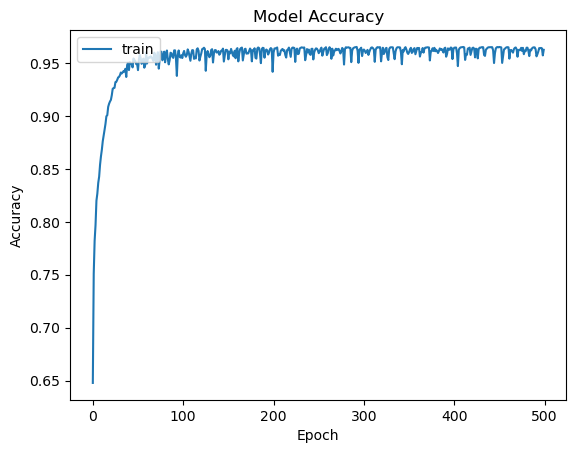

In [54]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(historyObject.history['accuracy'])
# plt.plot(historyObject.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

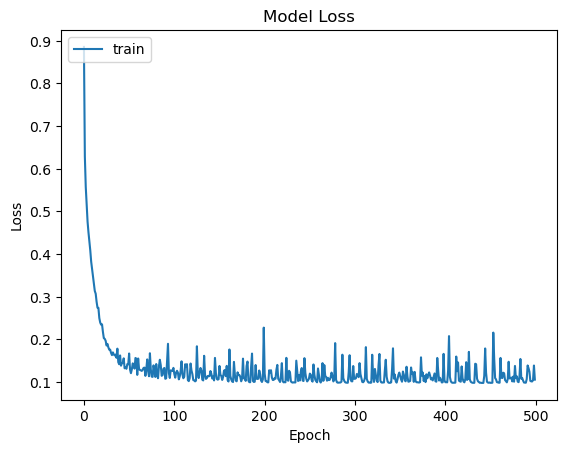

In [55]:
# summarize history for loss
plt.plot(historyObject.history['loss'])
# plt.plot(historyObject.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # Train-Test Method Ends!